In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('/Users/admin/Documents/Flatiron/dsc-phase-1-project-v2-4/im.db')

In [3]:
cur = conn.cursor()

In [4]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [5]:
cur.execute("""SELECT * FROM movie_basics;""")
cur.fetchall()
cur.description


(('movie_id', None, None, None, None, None, None),
 ('primary_title', None, None, None, None, None, None),
 ('original_title', None, None, None, None, None, None),
 ('start_year', None, None, None, None, None, None),
 ('runtime_minutes', None, None, None, None, None, None),
 ('genres', None, None, None, None, None, None))

In [6]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
pd.read_sql("""
SELECT DISTINCT movie_id 
FROM movie_ratings 
WHERE movie_id NOT IN 
    (SELECT DISTINCT movie_id 
    FROM movie_ratings); 
""", conn)

,movie_id


In [9]:
pd.read_sql("""
SELECT DISTINCT movie_id 
FROM movie_ratings 
WHERE movie_id NOT IN 
    (SELECT DISTINCT movie_id 
    FROM movie_ratings); 
""", conn)

,movie_id


In [10]:
pd.read_sql("""
SELECT movie_id 
FROM movie_ratings 
WHERE movie_id NOT IN 
    (SELECT movie_id 
    FROM movie_ratings); 
""", conn)

,movie_id


In [11]:
pd.read_sql("""
SELECT COUNT(movie_id)
FROM movie_ratings;
""", conn)

,COUNT(movie_id)
0,73856


In [12]:
pd.read_sql("""
SELECT COUNT(movie_id)
FROM movie_basics;
""", conn)

,COUNT(movie_id)
0,146144


In [13]:
pd.read_sql("""
SELECT DISTINCT COUNT(movie_id)
FROM movie_basics;
""", conn)

,COUNT(movie_id)
0,146144


In [14]:
pd.read_sql("""
SELECT DISTINCT COUNT(movie_id)
FROM movie_ratings;
""", conn)

,COUNT(movie_id)
0,73856


In [15]:
pd.read_sql("""
SELECT primary_title, averagerating
FROM movie_ratings as mr 
JOIN movie_basics as mb
    USING (movie_id)
GROUP BY averagerating
HAVING numvotes > 20
""", conn)

,primary_title,averagerating
0,Clownfish,1.0
1,Loqueesha,1.1
2,Pinkerton ni aini iku,1.2
3,Amazing China,1.3
4,Namaste England,1.6
...,...,...
62,My Father from Haifa,8.6
63,Astralis - Institution,8.7
64,Borderless,8.9
65,The Boys Are Back - Bandstand: The Broadway Mu...,9.3


In [16]:
pd.read_sql("""
SELECT *
FROM movie_ratings as mr 
JOIN movie_basics as mb
    USING (movie_id)
""", conn)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [17]:
pd.read_sql("""
SELECT *
FROM movie_ratings;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [18]:
pd.read_sql("""
SELECT *
FROM movie_ratings as mr 
JOIN movie_basics as mb
    USING (movie_id)
WHERE numvotes > 20
""", conn)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
3,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
4,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
...,...,...,...,...,...,...,...,...
49129,tt9691896,6.3,21,Out,Coming Out,2018,64.0,Documentary
49130,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary
49131,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
49132,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"


In [19]:
combined = pd.read_sql("""
SELECT *
FROM movie_ratings as mr 
JOIN movie_basics as mb
    USING (movie_id)
""", conn)

In [20]:
pd.options.display.float_format = "{:.2f}".format

In [21]:
combined.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.00,73856.00,73856.00,66236.00
mean,6.33,3523.66,2014.28,94.65
std,1.47,30294.02,2.61,208.57
min,1.00,5.00,2010.00,3.00
25%,5.50,14.00,2012.00,81.00
50%,6.50,49.00,2014.00,91.00
75%,7.40,282.00,2016.00,104.00
max,10.00,1841066.00,2019.00,51420.00


In [22]:
#combined.drop(combined.loc[combined['numvotes'] > 50000].index, inplace=T

In [23]:
most_votes = combined.sort_values('numvotes', ascending=False)[:200]
most_votes.averagerating.mean()

7.458499999999999

In [24]:
combined.averagerating

0       8.30
1       8.90
2       6.40
3       4.20
4       6.50
        ... 
73851   8.10
73852   7.50
73853   4.70
73854   7.00
73855   6.30
Name: averagerating, Length: 73856, dtype: float64

In [25]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

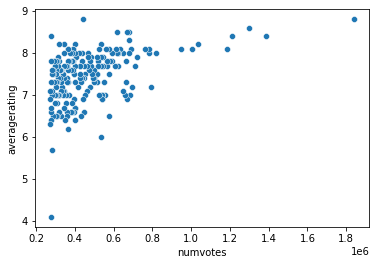

In [26]:
sns.scatterplot(x = 'numvotes', y = 'averagerating', data = most_votes)
plt.show()

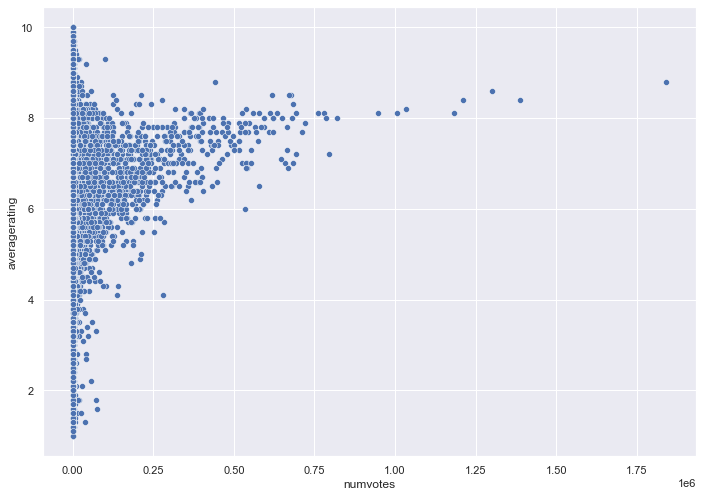

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x = 'numvotes', y = 'averagerating', data=combined)
plt.show()

In [30]:
combined['bin'] = pd.cut(combined['numvotes'], bins=range(0,1850000, 300000))


<AxesSubplot:xlabel='bin', ylabel='averagerating'>

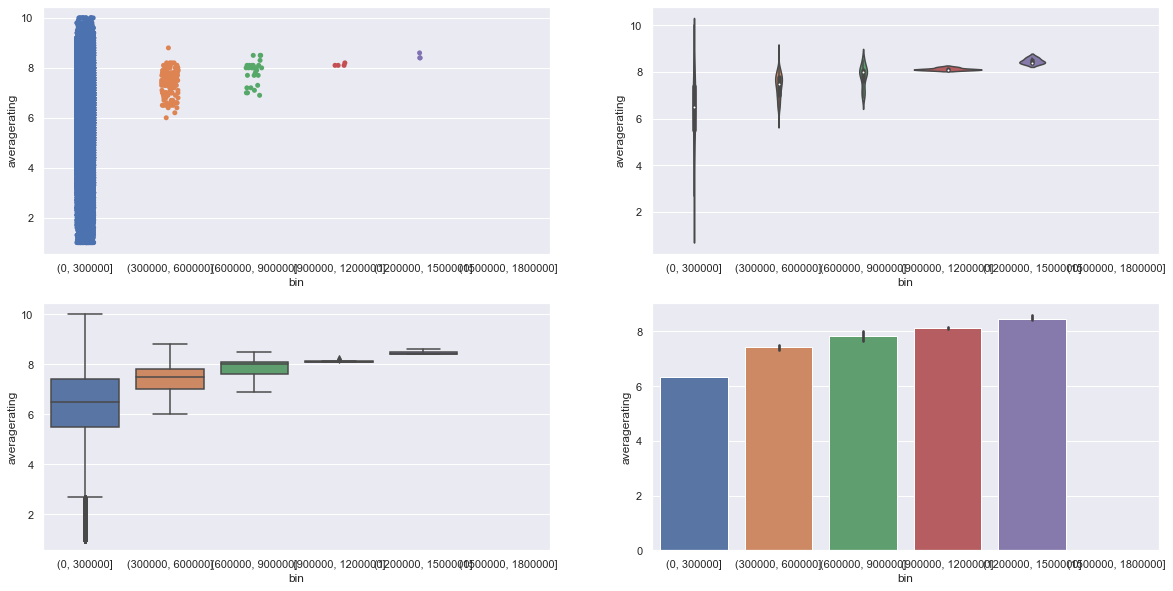

In [33]:
fig,ax = plt.subplots(2,2, figsize=(20,10))
ax=ax.flatten()
sns.stripplot(x='bin', y='averagerating', data=combined, ax=ax[0])
sns.violinplot(x='bin', y='averagerating', data=combined, ax=ax[1])
sns.boxplot(x='bin', y='averagerating', data=combined, ax=ax[2])
sns.barplot(x='bin', y='averagerating', data=combined, ax=ax[3])

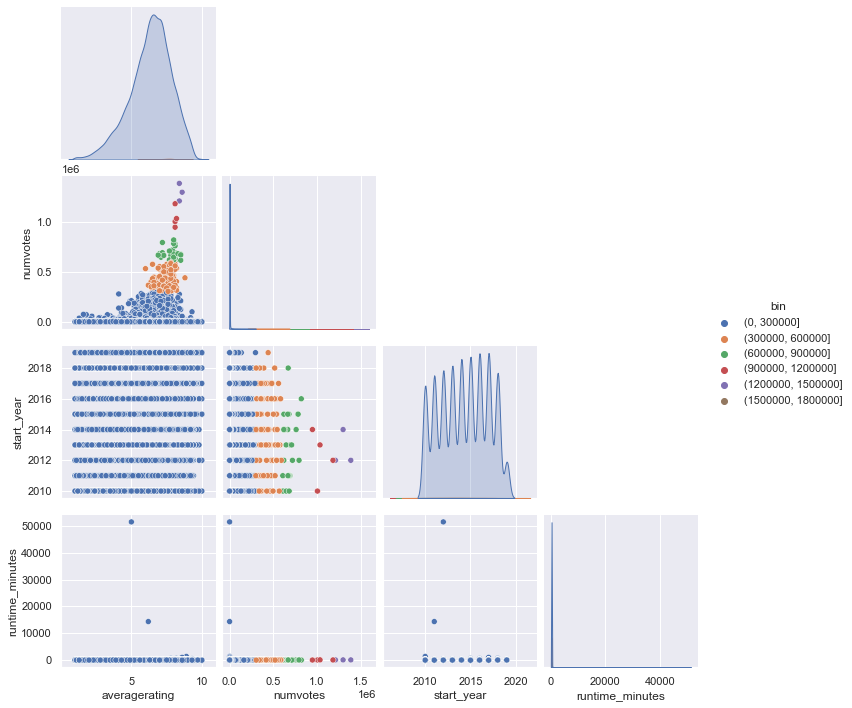

In [37]:
sns.pairplot(combined, hue='bin', corner = True)
plt.show()

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

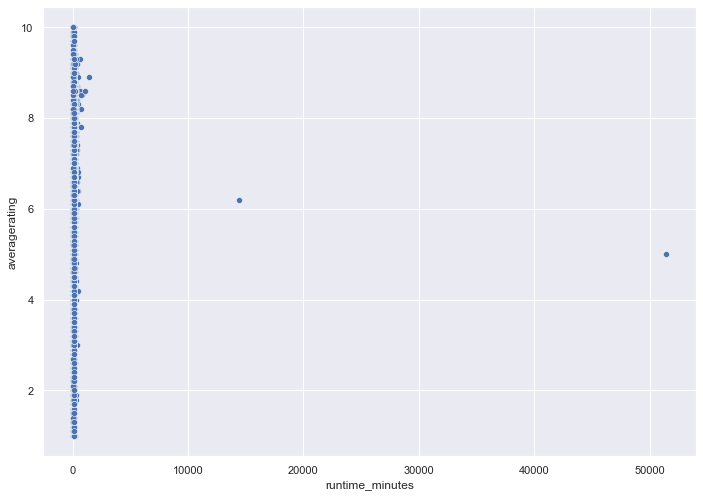

In [39]:
sns.scatterplot(x='runtime_minutes', y='averagerating', data=combined)

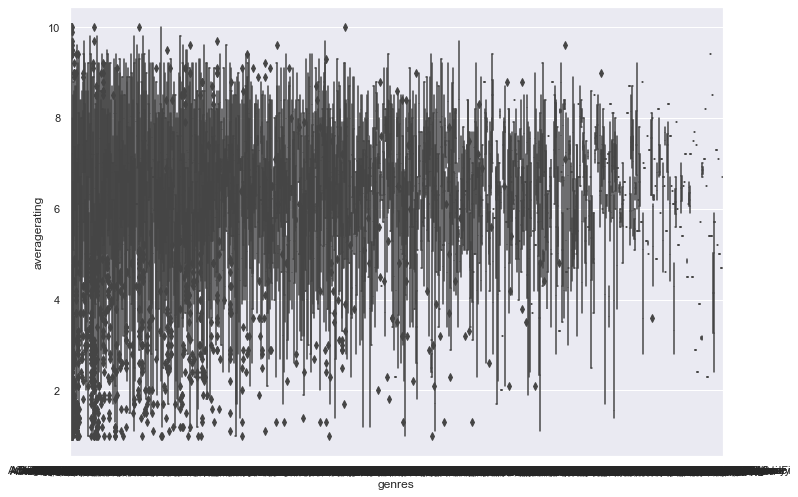

In [42]:
sns.boxplot(x='genres', y='averagerating', data=combined)
plt.show()

In [59]:
genres_combined = combined['genres'].str.split(',', expand = True)
genres_combined.dropna(inplace=True)


ValueError: Wrong number of items passed 3, placement implies 1

In [69]:
genres_joined = combined.join(genres_combined, how='outer')
genres_joined 


0                           [Romance]
1                       [Documentary]
2                             [Drama]
3        [Action, Adventure, Fantasy]
4                 [Mystery, Thriller]
                     ...             
73851                   [Documentary]
73852     [Action, Animation, Sci-Fi]
73853                 [Action, Drama]
73854                   [Documentary]
73855                      [Thriller]
Name: genres, Length: 73856, dtype: object

In [75]:
praveen_df = genres_joined.copy()

In [79]:
praveen_df = genres_joined.drop(columns = [0,1,2])


In [81]:
praveen_df['genre_list'] = praveen_df.genres.str.split(",")

praveen_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,bin,genre_list
0,tt10356526,8.30,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00,Romance,"(0, 300000]",[Romance]
1,tt10384606,8.90,559,Borderless,Borderless,2019,87.00,Documentary,"(0, 300000]",[Documentary]
2,tt1042974,6.40,20,Just Inès,Just Inès,2010,90.00,Drama,"(0, 300000]",[Drama]
3,tt1043726,4.20,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00,"Action,Adventure,Fantasy","(0, 300000]","[Action, Adventure, Fantasy]"
4,tt1060240,6.50,21,Até Onde?,Até Onde?,2011,73.00,"Mystery,Thriller","(0, 300000]","[Mystery, Thriller]"
...,...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.10,25,Caisa,Caisa,2018,84.00,Documentary,"(0, 300000]",[Documentary]
73852,tt9844256,7.50,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.00,"Action,Animation,Sci-Fi","(0, 300000]","[Action, Animation, Sci-Fi]"
73853,tt9851050,4.70,14,Sisters,Sisters,2019,nan,"Action,Drama","(0, 300000]","[Action, Drama]"
73854,tt9886934,7.00,5,The Projectionist,The Projectionist,2019,81.00,Documentary,"(0, 300000]",[Documentary]


In [88]:
genres_joined['genre_list'] = genres_joined.genres.str.split(",")

In [87]:
genres_joined.drop(columns = [0,1,2], inplace=True)

In [89]:
exploded_genres_combined = genres_joined.explode('genre_list')

In [100]:
exploded_genres_combined[['averagerating', 'genre_list']].groupby('genre_list').mean().sort_values(by='averagerating')

,averagerating
genre_list,
Adult,3.77
Horror,5.00
Sci-Fi,5.49
Thriller,5.64
Action,5.81
Western,5.87
Fantasy,5.92
Mystery,5.92
Comedy,6.00


In [83]:
exploded_praveen = praveen_df.explode('genre_list')

In [98]:
exploded_praveen[['numvotes', 'genre_list']].groupby('genre_list').mean()

,numvotes
genre_list,
Action,14476.49
Adult,54.67
Adventure,22067.75
Animation,8808.55
Biography,5673.26
Comedy,4297.62
Crime,8594.96
Documentary,266.96
Drama,3883.57


In [48]:
#checking to see if genres correspond to BOM database
combined.loc[combined['primary_title'] == 'The Extra Man']

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,bin
36107,tt1361313,5.90,4580,The Extra Man,The Extra Man,2010,108.00,Comedy,"(0, 300000]"


/Users/admin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/admin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/admin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/admin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


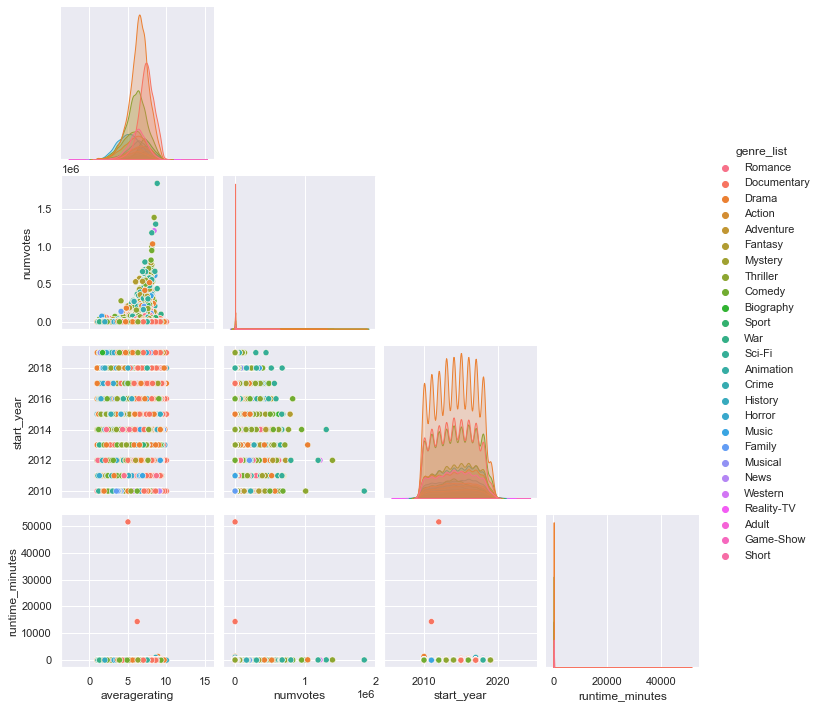

In [104]:
sns.pairplot(exploded_genres_combined, hue='genre_list', corner = True)
plt.show()

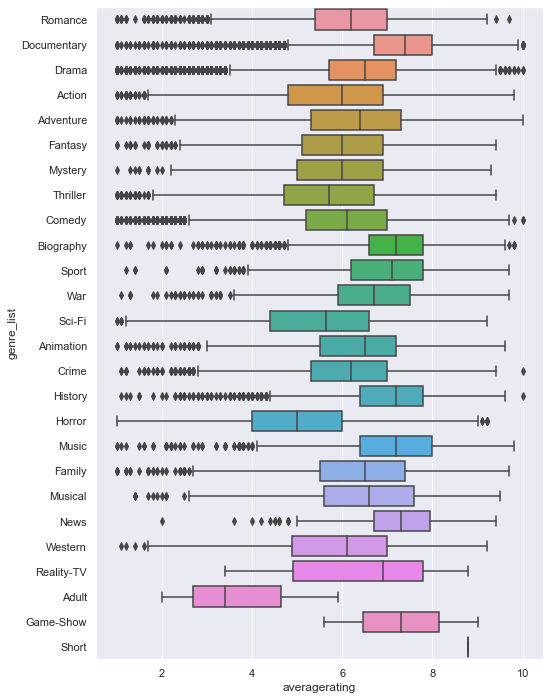

In [111]:
fig, ax = plt.subplots(figsize = (8,12))
sns.boxplot(x='averagerating', y='genre_list', data=exploded_genres_combined)
plt.show()

In [ ]:
sns.barplot(x = 'averagerating', y = 'genre_list', data = exploded_genres_combined)
plt.show()

In [132]:
combined['genres'].isnull().value_counts()



False    73052
True       804
Name: genres, dtype: int64

In [137]:
test = combined.loc[combined['genres'].isnull()]
test

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,bin
459,tt7293844,7.20,26,Los Corroboradores,Los Corroboradores,2017,70.00,None,"(0, 300000]"
502,tt7461982,8.50,6,Ntou apo pantou,Ntou apo pantou,2017,nan,None,"(0, 300000]"
567,tt7895368,9.00,7,Break Through the Snare,Break Through the Snare,2015,nan,None,"(0, 300000]"
994,tt1726707,8.10,43,One Night Stand,One Night Stand,2011,73.00,None,"(0, 300000]"
1058,tt1790807,6.00,20,Pig Death Machine,Pig Death Machine,2013,82.00,None,"(0, 300000]"
...,...,...,...,...,...,...,...,...,...
73458,tt3645464,4.90,7,Aquilo que Fazemos com as Nossas Desgraças,Aquilo que Fazemos com as Nossas Desgraças,2014,63.00,None,"(0, 300000]"
73651,tt7598894,9.20,58,Gospel Movie: Song of Victory,Gospel Movie: Song of Victory,2016,179.00,None,"(0, 300000]"
73656,tt7638100,8.90,81,What a Beautiful Voice,What a Beautiful Voice,2017,nan,None,"(0, 300000]"
73674,tt7768834,6.80,16,Akicita: The Battle of Standing Rock,Akicita: The Battle of Standing Rock,2018,nan,None,"(0, 300000]"


In [135]:
test.averagerating.mean()

6.496144278606964

In [142]:
imdb_genre_test = set(exploded_genres_combined['genre_list'])
imdb_genre_test

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 None,
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [141]:
tmdb = pd.read_csv('/Users/admin/Documents/Flatiron/Movie_Production_Recommendations/data/tmdb.movies.csv')

In [144]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [146]:
bom = pd.read_csv('/Users/admin/Documents/Flatiron/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz')
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [147]:
pwd

'/Users/admin/Documents/Flatiron/dsc-phase-1-project-v2-4/zippedData'